<a href="https://colab.research.google.com/github/Eudson7/Python_Geocodificacao_reversa/blob/main/Geocodifica%C3%A7%C3%A3o_reversa_em_Python_Coordenadas_em_endere%C3%A7o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geocodificação reversa em Python
Como converter latitude / longitude bruta em dados perspicazes com endereços.

https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6

Muitos conjuntos de dados têm apenas coordenadas - latitude e longitude - e não têm qualquer associação com características identificáveis como endereços, nomes de ruas, nomes de edifícios ou códigos postais que nós, humanos, reconheçamos. A geocodificação reversa é um componente essencial em muitas aplicações de ciência de dados de localização. O processo de conversão das coordenadas brutas em recursos de dados de localização criteriosos é chamado de Geocodificação reversa.
A geocodificação reversa é o processo de codificação reversa (reversa) de uma localização de ponto (latitude, longitude) para um endereço legível ou nome de local. - Wikipedia

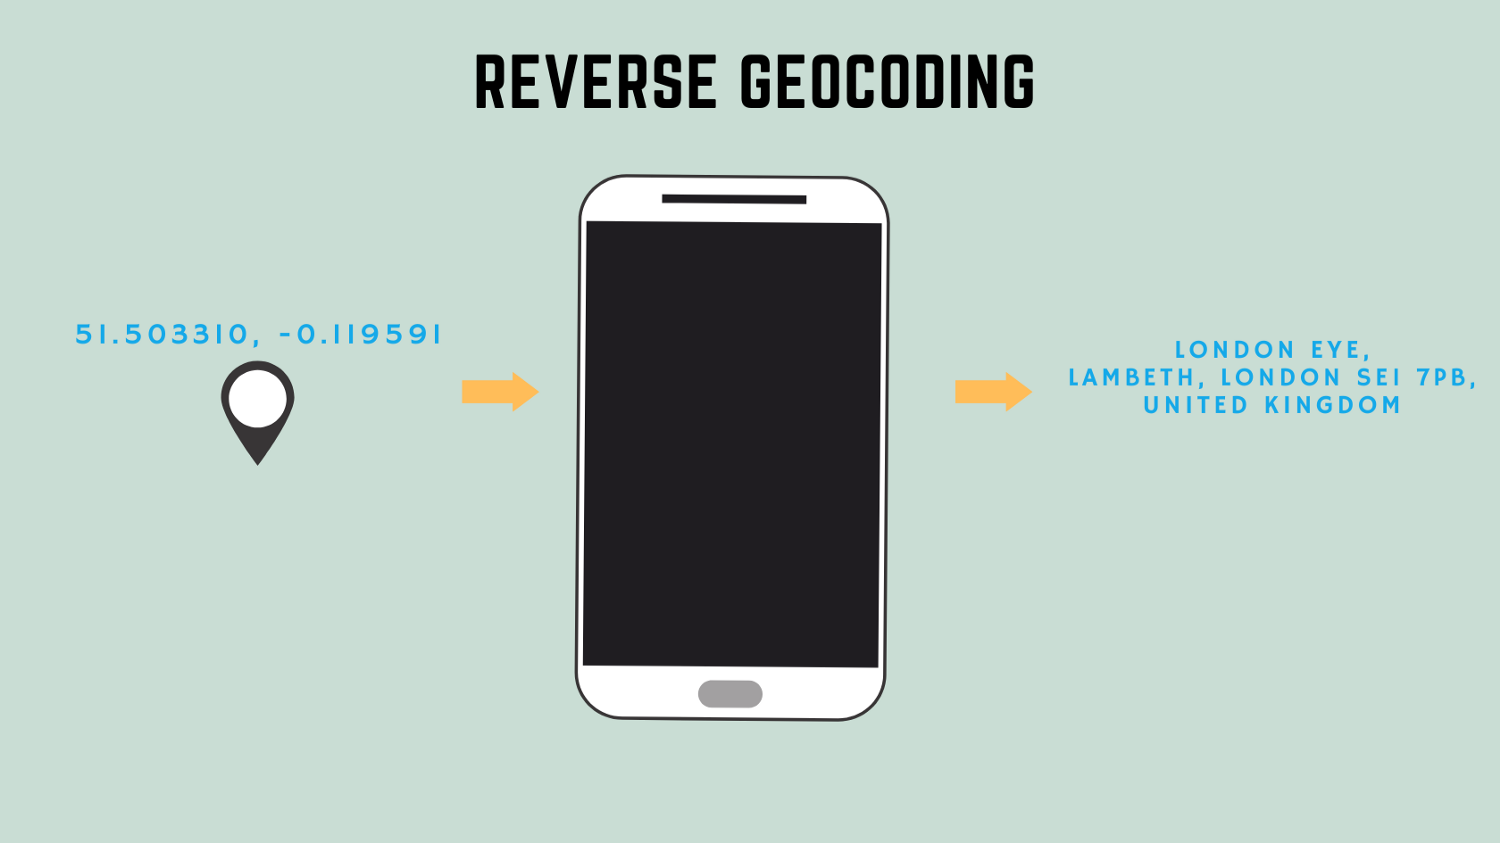

338 / 5000
Resultados de tradução
Neste tutorial, vamos cobrir como realizar geocodificação reversa usando Python. Usamos bibliotecas Pandas e Geopy para fornecer geocodificação reversa. Na próxima seção, cobriremos o básico e converteremos as coordenadas de um único ponto em um endereço com código postal e nome do edifício.

Vamos instalar os pacotes necessários

In [ ]:
!pip install geopandas
!pip install plotly_express
!pip install pandas
!pip install ipython-autotime
!pip install tqdm==4.62.2
#!pip install tqdm==4.36.0

# Exemplo simples de geocodificação reversa
Vamos importar nossas bibliotecas primeiro.

In [ ]:
%load_ext autotime
import pandas as pd

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

time: 388 µs (started: 2021-11-13 19:33:45 +00:00)


Agora podemos construir nosso geocodificador. Primeiro precisamos especificar o serviço de geocodificação. Você pode acessar diferentes serviços, incluindo 'google', 'bing', 'yahoo' and 'openmapquest'. Alguns desses serviços cobram pouco depois de um limite específico, mas em nosso exemplo, usaremos o serviço de geocodificação gratuito do Openstreetmap.

Depois de fornecer as coordenadas com o serviço de geocodificação de nossa escolha, o resultado é um dicionário de diferentes recursos que você pode acessar. Se você imprimir o elemento bruto da localização, verá vários recursos interessantes derivados das coordenadas.

In [ ]:
#locator = Nominatim(user_agent="myGeocoder")
locator = Nominatim(user_agent="my-application")
coordinates = "53.480837, -2.244914"
location = locator.reverse(coordinates)
location.raw

{'address': {'building': 'Eagle Insurance Buildings',
  'city': 'Manchester',
  'country': 'United Kingdom',
  'country_code': 'gb',
  'county': 'Greater Manchester',
  'house_number': '68',
  'neighbourhood': 'Gay Village',
  'postcode': 'M2 4NJ',
  'road': 'Cross Street',
  'state': 'England',
  'state_district': 'North West England',
  'suburb': 'City Centre'},
 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576'],
 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, Gay Village, City Centre, Manchester, Greater Manchester, North West England, England, M2 4NJ, United Kingdom',
 'lat': '53.4809597',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-2.2450668274629235',
 'osm_id': 37139875,
 'osm_type': 'way',
 'place_id': 111898782}

time: 269 ms (started: 2021-11-13 19:40:19 +00:00)


Aqui você tem um edifício, código postal, endereço, país, nome da estrada e um monte de outros atributos perspicazes que não estavam disponíveis com as coordenadas brutas. Se você está interessado apenas em imprimir apenas o endereço, pode usar as chaves do dicionário ou fazer diretamente assim.

In [ ]:
print(location.address)

Eagle Insurance Buildings, 68, Cross Street, Gay Village, City Centre, Manchester, Greater Manchester, North West England, England, M2 4NJ, United Kingdom


E vai imprimir a parte do endereço da saída. Na próxima seção, veremos como podemos usar a geocodificação reversa no Pandas DataFrame.

# Geocodificação reversa com Pandas DataFrame
Freqüentemente, é um subconjunto ou conjunto de dados completo que desejamos obter endereços de latitude e longitude - Geocodificação reversa - em vez de coordenadas individuais. Nesta seção, exploramos como podemos fazer isso com Pandas e Geopy.
Primeiro, lemos os dados do URL no Pandas. Os dados são armazenados no Dropbox e podemos usar facilmente com o Pandas se tivermos um link. Você só precisa se certificar de que os últimos caracteres da URL estão configurados para “dl = 1”.

In [ ]:
url = "https://www.dropbox.com/s/15gisj8hx218rn1/street-pole-sample.csv?dl=1"
cols = ["X", "Y", "POLE_NUM","TYPE","HEIGHT","POLE_DATE","OWNER"]
df = pd.read_csv(url, usecols=cols)

Os dados possuem colunas X e Y onde as coordenadas são armazenadas com outros recursos, conforme mostrado abaixo nesta tabela.

In [ ]:
df.head()

,X,Y,POLE_NUM,TYPE,HEIGHT,POLE_DATE,OWNER
0,-75.170097,39.942766,214423,WP,NaN,1997-06-09T00:00:00.000Z,PECO
1,-75.166112,39.941477,215645,AAPT,25.0,1997-06-10T00:00:00.000Z,Streets
2,-75.163483,39.943068,215926,WP,NaN,1997-06-04T00:00:00.000Z,PECO
3,-75.167727,39.944528,214515,WP,25.0,1997-06-09T00:00:00.000Z,Streets
4,-75.171863,39.941486,214380,WP,25.0,1997-06-09T00:00:00.000Z,Streets


Vamos ver o tamanho da tabela abaixo

In [ ]:
df.shape

(150, 7)

Também podemos explorar os dados e mostrá-los em um mapa usando o Plotly Express. Com apenas uma linha de código, você pode mostrar um mapa com um mapa interativo básico.

In [ ]:
import plotly_express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
px.scatter_mapbox(df, lat="Y", lon="X", zoom=14.5)

O mapa mostra um subconjunto de postes de rua Phillidelphia. Agora, precisamos construir a coluna de coordenadas das colunas X e Y. Podemos fazer isso simplesmente mapeando essas duas colunas (X e Y) como strings e, em seguida, concatená-las com uma vírgula.

In [ ]:
df["geom"] = df["Y"].map(str) + ',' + df['X'].map(str)
df["geom"][0]

'39.9427660880249,-75.17009743393821'

Aqui está como a primeira linha da coluna geom que criamos acima.

Criamos um localizador de provedor de serviço com o tempo limite de passagem de tempo de 10 minutos, pois temos muitas linhas. Isso evitará erros de tempo limite que você possa encontrar durante o processo.

In [ ]:
#locator = Nominatim(user_agent="myGeocoder", timeout=10)
locator = Nominatim(user_agent="my-application", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [ ]:
rgeocode

Agora, podemos reverter o geocode usando a aplicação do rgeocode de geocodificação reversa que criamos acima. Para obter uma boa barra de progresso, estamos usando aqui a biblioteca tqdm.

In [ ]:
#tqdm.pandas()
tqdm_notebook().pandas()
df['address'] = df['geom'].progress_apply(rgeocode)

0it [00:00, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
df.head()

,X,Y,POLE_NUM,TYPE,HEIGHT,POLE_DATE,OWNER,geom,address
0,-75.170097,39.942766,214423,WP,NaN,1997-06-09T00:00:00.000Z,PECO,"39.9427660880249,-75.17009743393821","(723, South Chadwick Street, South Philadelphi..."
1,-75.166112,39.941477,215645,AAPT,25.0,1997-06-10T00:00:00.000Z,Streets,"39.941477314134396,-75.166112027818","(Tindley Temple United Methodist Church, 750, ..."
2,-75.163483,39.943068,215926,WP,NaN,1997-06-04T00:00:00.000Z,PECO,"39.9430681055253,-75.1634826347411","(1302, South 13th Street, Martin Luther King P..."
3,-75.167727,39.944528,214515,WP,25.0,1997-06-09T00:00:00.000Z,Streets,"39.9445279530865,-75.16772651013079","(PowerBack Rehabilitation, Naudain Street, Rit..."
4,-75.171863,39.941486,214380,WP,25.0,1997-06-09T00:00:00.000Z,Streets,"39.9414861490123,-75.17186304554191","(Marian Anderson Community Center, Catharine S..."


Pode demorar um pouco, dependendo do número de linhas no conjunto de dados. Mas quando o processo terminar, você terá um recurso adicional no conjunto de dados em que cada ponto tem um endereço conforme mostrado abaixo.
Os dados agora têm atributos muito mais perspicazes associados a cada ponto, incluindo endereço, código postal, edifícios, etc. ...
Demorou 1 minuto e 45 segundos para realizar a geocodificação reversa com apenas 150 pontos. O tempo de cálculo provavelmente não é uma boa opção, pois um aumento nos pontos de dados exigirá muito tempo de processamento. Se você tiver um grande conjunto de dados, pode tentar diminuir os segundos de atraso.

# Conclusão
Neste artigo, exploramos como você pode reverter coordenadas de geocodificação para endereços. Você pode acessar o bloco de notas para este tutorial neste Google Colab Notebook.